In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 15
pd.options.display.max_columns = 15

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly import graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torchmetrics
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
Data = pd.read_csv("../input/dmspparticleprecipitatefluxprediction/Compressed_Data_for_Training_Model.csv",
                      parse_dates=["Datetimes"])
Data.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
# Data.info()
# Data.columns.to_list()

# Checking Null Values

In [4]:
# def missing( df ):
# #     high_missing_values_features = []
# #     missing_values_features_less_5 = []
# #     missing_values_features_btw_5_and_40 = []
#     missing_values_features = []
#     for column in df.columns.values:
#         print( "Feature:- ", column )
#         percent_missing = df[column].isnull().sum()/df[column].shape[0]*100
#         print('Percentage of Missing Values:- ', percent_missing )
    
# #         if percent_missing>=25:
# #             high_missing_values_features.append( column )
# #         elif percent_missing<=40:
# #             missing_values_features_less_5.append( column )
# #         elif percent_missing>5 & percent_missing<=40:
# #             missing_values_features_btw_5_and_25.append( column )
#         print("--------------------------------------------------------------")
#         print("\n")
#     return # missing_values_features_less_5, missing_values_features_btw_5_and_40,  high_missing_values_features

# missing(Data)

No Null Values are present

In [5]:
Data

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,...,SymH_1hr,PC_1hr,vsw_1hr,vx_1hr,psw_1hr,borovsky_1hr,newell_1hr
0,1987-01-12 12:57:00,51.16,5.664,2.057827e+08,0.41110,39.90,0.4114,...,7.500,0.830,368.2,-368.0,4.766,15725.455,1005.5
1,1987-01-12 12:58:00,54.12,5.535,2.509837e+08,0.47830,40.80,0.4785,...,7.500,0.830,368.2,-368.0,4.766,15725.455,1005.5
2,1987-01-12 13:01:00,62.94,5.030,4.469146e+08,0.60350,143.80,0.6040,...,7.668,0.763,367.0,-366.5,4.770,17715.834,1181.0
3,1987-01-12 13:02:00,65.75,4.793,1.934849e+10,0.10364,820.50,0.1037,...,7.668,0.763,367.0,-366.5,4.770,17715.834,1181.0
4,1987-01-12 13:03:00,68.40,4.508,3.913337e+11,0.11490,5292.00,0.1149,...,7.668,0.763,367.0,-366.5,4.770,17715.834,1181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945882,2014-12-31 22:50:00,57.60,19.670,2.231577e+08,0.19620,39.72,0.2742,...,-12.000,-0.115,516.0,-515.5,1.650,8304.948,716.0
1945883,2014-12-31 22:51:00,54.94,19.580,3.074197e+08,0.19090,42.30,0.2573,...,-12.000,-0.115,516.0,-515.5,1.650,8304.948,716.0
1945884,2014-12-31 22:52:00,52.28,19.520,1.917582e+08,0.22180,41.80,0.3000,...,-12.000,-0.115,516.0,-515.5,1.650,8304.948,716.0
1945885,2014-12-31 22:53:00,49.62,19.450,2.265864e+08,0.20350,39.70,0.2780,...,-12.000,-0.115,516.0,-515.5,1.650,8304.948,716.0


Plotting Target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX', ylabel='Density'>

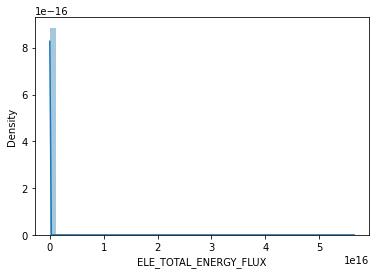

In [6]:
# fig = ff.create_distplot([ Data['ELE_TOTAL_ENERGY_FLUX']],['ELE_TOTAL_ENERGY_FLUX'], 
#                               bin_size= (Data['ELE_TOTAL_ENERGY_FLUX'].max() - Data['ELE_TOTAL_ENERGY_FLUX'].min())/50 ,
#                               show_hist=True, show_rug=True)
# fig.layout.update({'title': 'Delta Eta' })
# fig.show()

sns.distplot(Data['ELE_TOTAL_ENERGY_FLUX'])

Target Variable is Highly Skewed

<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX'>

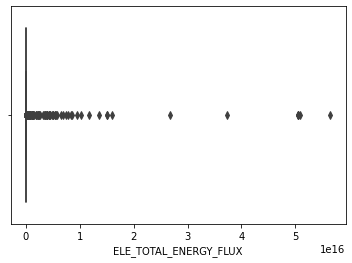

In [7]:
sns.boxplot(x=Data['ELE_TOTAL_ENERGY_FLUX'])

In [8]:
# Data_ID = Data[["ID_SC"]]
Data_DateTime = Data[['Datetimes']]
# Data.drop(columns=["ID_SC"], inplace=True)
Data.drop(columns=["Datetimes"], inplace=True)

Removing Outliers from Target Variable

In [9]:
"Threshold"
Upper_Threshold = np.percentile(Data['ELE_TOTAL_ENERGY_FLUX'], 99.995 )
print("Old Shape: ", Data.shape)

"Removing the Outliers"
Data = Data[ (Data['ELE_TOTAL_ENERGY_FLUX'].values < Upper_Threshold )]
print("New Shape: ", Data.shape)

Old Shape:  (1945887, 83)
New Shape:  (1945789, 83)


In [10]:
Data.to_csv('Data_Preprocessed.csv')

# Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split( Data.drop(['ELE_TOTAL_ENERGY_FLUX'], axis=1), Data[['ELE_TOTAL_ENERGY_FLUX']], 
                                                        test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1362052, 82), (583737, 82), (1362052, 1), (583737, 1))

In [12]:
Data = 0

Normalization

In [13]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),  columns=X_train.columns)

Removing the steradian from the DMSP data BEFORE training

In [14]:
# The units of the energy flux are eV/cm2/s/ster
#   --> To remove the 'steradian' multiply by PI (see: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2016JA023339)
y_train = y_train*np.pi
y_test = y_test*np.pi

Log-transforming the target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX', ylabel='Density'>

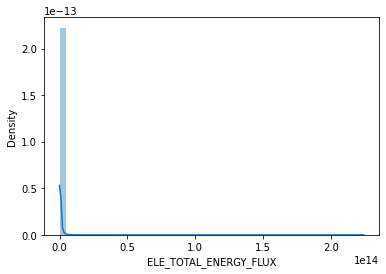

In [15]:
sns.distplot(y_train['ELE_TOTAL_ENERGY_FLUX'])

In [16]:
y_train['ELE_TOTAL_ENERGY_FLUX'] = y_train['ELE_TOTAL_ENERGY_FLUX'].apply(lambda x: np.log(x))
y_test['ELE_TOTAL_ENERGY_FLUX'] = y_test['ELE_TOTAL_ENERGY_FLUX'].apply(lambda x: np.log(x))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX', ylabel='Density'>

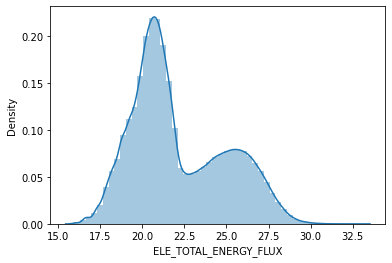

In [17]:
sns.distplot(y_train['ELE_TOTAL_ENERGY_FLUX'])

***

Principle Component Analysis (PCA)

In [18]:
# from sklearn.decomposition import PCA
# # PCA-fitting the training set
# pca = PCA(n_components = 30)
# pca.fit(X_train)

# # PCA summary
# print(pd.Series({"Number of components": "{}".format(pca.n_components_),
#                  "Explained variance ratio": "{:.4g}%".format(pca.explained_variance_ratio_.sum()*100)
#                 }).to_string())

# # PCA-transforming the training set features
# X_train = pd.DataFrame(pca.transform(X_train))
# print(pd.Series({"Shape": "{}".format(X_train.shape)}).to_string())
# print(" ")
# X_train.head()

# # PCA transforming the test set features
# X_test = pd.DataFrame(pca.transform(X_test))
# print(pd.Series({"Shape": "{}".format(X_test.shape)}).to_string())
# print(" ")
# X_test.head()

***

# Keras Tuner ANN Model

Some Functions for Graph plotting

In [ ]:
def Plot_Loss_Accuracy( history, epochs ):
    loss = history.history['root_mean_squared_error']
    val_loss = history.history['val_root_mean_squared_error']

    epochs = np.linspace(1,epochs,epochs)
    epochs

    fig = go.Figure(data=go.Scatter( x=epochs, y=loss, name='Root_Mean_Squared_Error' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_loss, name='Val_Root_Mean_Squared_Error' ) )
    fig.update_layout( title="Root Mean Squared Error", xaxis_title='epochs' )
    fig.update_layout(legend=dict( orientation="h", yanchor="bottom", y=1.02, xanchor="right",  x=1), width=1000, height=750)    
    fig.show()

### Deep Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Creating the function for calculation of R2-score
from tensorflow.keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [20]:
def hypertuning_model(hp):
    
    model = Sequential()
    model.add( InputLayer( input_shape=X_train.shape[1] ))
    
#     lstm = hp.Choice('LSTM',values=["Yes","No"] )
#     if lstm =="Yes":
#         model.add( LSTM( 500, return_sequences=False ) ) 

    number_of_layers = hp.Int('No_of_Layers',min_value=2,max_value=5)
    for num_layer in range(1, number_of_layers+1 ):
        model.add( Dense( hp.Int('layer'+str(num_layer), min_value=100, max_value=500, step=50),
                             kernel_initializer=hp.Choice('kernel_initializer',values=['glorot_uniform','uniform','normal']) ,
                             activation=tf.keras.layers.LeakyReLU(alpha=hp.Float('alpha'+str(num_layer), min_value=0.01, max_value=0.03, step=0.01))))
        model.add( Dropout( hp.Choice('rate',values=[0.0,0.1,0.2] )))
        # model.add( BatchNormalization() )'uniform'
        
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r2_score],
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4])))
    
    return model

In [21]:
hyper_tuned_model = kt.Hyperband( hypertuning_model, objective='val_loss',overwrite=True, max_epochs=10,seed=10 )

2022-10-04 21:42:00.453875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 21:42:00.455150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 21:42:00.455836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 21:42:00.456746: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
# call_back_ES = EarlyStopping(monitor='val_loss',patience=3)
# call_back_MCP = tf.keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# hyper_tuned_model.search( X_train,y_train, validation_data=(X_test,y_test), epochs=10, callbacks=[call_back_ES,call_back_MCP], batch_size=64 )

Trial 30 Complete [00h 13m 25s]
val_loss: 0.2982781231403351

Best val_loss So Far: 0.2982781231403351
Total elapsed time: 02h 16m 43s


Trial 30 Complete [00h 13m 25s]
val_loss: 0.2982781231403351

Best val_loss So Far: 0.2982781231403351
Total elapsed time: 02h 16m 43s

In [23]:
# best_hyperparameters = hyper_tuned_model.get_best_hyperparameters(num_trials=1)[0]
# best_hyperparameters.values

{'No_of_Layers': 4,
 'layer1': 350,
 'kernel_initializer': 'glorot_uniform',
 'alpha1': 0.02,
 'rate': 0.0,
 'layer2': 450,
 'alpha2': 0.01,
 'learning_rate': 0.001,
 'layer3': 200,
 'alpha3': 0.02,
 'layer4': 350,
 'alpha4': 0.02,
 'layer5': 500,
 'alpha5': 0.01,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

Hyperparamters after Tunning: <br>

 'No_of_Layers': 4, <br>
 'layer1': 350, <br>
 'kernel_initializer': 'glorot_uniform',<br>
 'alpha1': 0.02, <br>
 'rate': 0.0, <br>
 'layer2': 450, <br>
 'alpha2': 0.01, <br>
 'learning_rate': 0.001, <br>
 'layer3': 200, <br>
 'alpha3': 0.02, <br>
 'layer4': 350, <br>
 'alpha4': 0.02, <br>
 'layer5': 500, <br> 
 'alpha5': 0.01, <br>
 'tuner/epochs': 10, <br> 
 'tuner/initial_epoch': 0, <br>
 'tuner/bracket': 0, <br>
 'tuner/round': 0 <br>

Training Best DNN Model with large no. of epoch

In [37]:
# Neural network
model_DNN = Sequential()
model_DNN.add( InputLayer( input_shape=X_train.shape[1] ))
model_DNN.add(Dense(350,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
model_DNN.add(Dense(450,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model_DNN.add(Dense(200,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
model_DNN.add(Dense(350,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
model_DNN.add(Dense(500,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

model_DNN.add(Dense(1, activation='linear'))
model_DNN.compile(loss='mean_squared_error' , optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=[tf.keras.metrics.RootMeanSquaredError(),r2_score])

In [38]:
call_back_ES = EarlyStopping(monitor='val_loss',patience=3)
call_back_MCP = tf.keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

history = model_DNN.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=50, callbacks=[call_back_ES,call_back_MCP,tensorboard_callback], batch_size=64 )

model_DNN.model.save_model("model_DNN.h5")
Plot_Loss_Accuracy( history, epochs=50 )

2022-10-05 06:39:11.582484: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-05 06:39:11.582552: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-05 06:39:12.512976: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-05 06:39:12.513156: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/50


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 1, 82)


LSTM

In [21]:
X_train.to_csv("X_train_backup.csv")
X_test.to_csv("X_test_backup.csv")
y_train.to_csv("y_train_backup.csv")
y_test.to_csv("y_test_backup.csv")
X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

In [30]:
def hypertuning_model(hp):
    
    model = Sequential()
    model.add( InputLayer( input_shape=(X_train.shape[1],X_train.shape[2] )))

    model.add( LSTM( hp.Choice('LSTM_Units',values=[250,500] ), return_sequences=False ) ) 

    number_of_layers = hp.Int('No_of_Layers',min_value=2,max_value=5)
    for num_layer in range(1, number_of_layers+1 ):
        model.add( Dense( hp.Int('layer'+str(num_layer)+" units", min_value=250, max_value=500, step=50),
                             kernel_initializer=hp.Choice('kernel_initializer',values=['glorot_uniform']) ,
                             activation=tf.keras.layers.LeakyReLU(alpha=hp.Float('alpha'+str(num_layer), min_value=0.01, max_value=0.02, step=0.01))))
        model.add( Dropout( hp.Choice('rate',values=[0.0,0.1,0.2] )))
        # model.add( BatchNormalization() )'uniform'
        
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r2_score],
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[ 1e-2, 1e-3, 1e-4])))
    
    return model

In [31]:
# hyper_tuned_model = kt.Hyperband( hypertuning_model, objective='val_loss',overwrite=True, max_epochs=10,seed=10 )
# call_back_ES = EarlyStopping(monitor='val_loss',patience=3)
# call_back_MCP = tf.keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# hyper_tuned_model.search( X_train,y_train, validation_data=(X_test,y_test), epochs=10, callbacks=[call_back_ES,call_back_MCP], batch_size=64 )

Trial 30 Complete [00h 17m 39s]
val_loss: 0.317158579826355

Best val_loss So Far: 0.265652060508728
Total elapsed time: 03h 37m 21s


Trial 30 Complete [00h 17m 39s] <br>
val_loss: 0.317158579826355 <br>

Best val_loss So Far: 0.26565206 0508728 <br>
Total elapsed time: 03h 37m 21s

In [32]:
# best_hyperparameters = hyper_tuned_model.get_best_hyperparameters(num_trials=1)[0]
# best_hyperparameters.values

{'LSTM_Units': 250,
 'No_of_Layers': 3,
 'layer1 units': 500,
 'kernel_initializer': 'glorot_uniform',
 'alpha1': 0.01,
 'rate': 0.0,
 'layer2 units': 350,
 'alpha2': 0.02,
 'learning_rate': 0.001,
 'layer3 units': 350,
 'alpha3': 0.01,
 'layer4 units': 250,
 'alpha4': 0.02,
 'layer5 units': 450,
 'alpha5': 0.01,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

{'LSTM_Units': 250, <br> 
 'No_of_Layers': 3, <br>
 'layer1 units': 500, <br>
 'kernel_initializer': 'glorot_uniform', <br>
 'alpha1': 0.01, <br>
 'rate': 0.0, <br>
 'layer2 units': 350, <br>
 'alpha2': 0.02, <br>
 'learning_rate': 0.001, <br>
 'layer3 units': 350, <br>
 'alpha3': 0.01, <br> 
 'layer4 units': 250, <br>
 'alpha4': 0.02, <br> 
 'layer5 units': 450, <br>
 'alpha5': 0.01, <br>
 'tuner/epochs': 10, <br>
 'tuner/initial_epoch': 0, <br>
 'tuner/bracket': 0, <br>
 'tuner/round': 0}

In [41]:
# LSTM Neural network
model_LSTM_NN = Sequential()
model_LSTM_NN.add( InputLayer( input_shape=(X_train.shape[1],X_train.shape[2] )))

model_LSTM_NN.add( LSTM( 250, return_sequences=False ))

model_LSTM_NN.add(Dense(500,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model_LSTM_NN.add(Dense(350,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
model_LSTM_NN.add(Dense(350,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model_LSTM_NN.add(Dense(250,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.02)))
model_LSTM_NN.add(Dense(450,kernel_initializer="glorot_uniform", activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

model_LSTM_NN.add(Dense(1, activation='linear'))
model_LSTM_NN.compile(loss='mean_squared_error' , optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=[tf.keras.metrics.RootMeanSquaredError(),r2_score])

In [42]:
call_back_ES = EarlyStopping(monitor='val_loss',patience=3)
call_back_MCP = tf.keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

history = model_LSTM_NN.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=50, callbacks=[call_back_ES,call_back_MCP,tensorboard_callback], batch_size=64 )

model_LSTM_NN.model.save_model("model_LSTM_NN.h5")
Plot_Loss_Accuracy( history, epochs=50 )

2022-10-05 06:42:33.644371: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-05 06:42:33.644438: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-05 06:42:34.572106: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-05 06:42:34.572290: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/50
    1/21283 [..............................] - ETA: 8:46:14 - loss: 514.9496 - root_mean_squared_error: 22.6925 - r2_score: -63.5605

2022-10-05 06:42:37.628606: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-05 06:42:37.628667: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


    3/21283 [..............................] - ETA: 3:59:26 - loss: 506.4209 - root_mean_squared_error: 22.5038 - r2_score: -63.7237

2022-10-05 06:42:38.707973: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-05 06:42:38.708555: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-10-05 06:42:38.850432: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 194 callback api events and 190 activity events. 
2022-10-05 06:42:38.858890: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-05 06:42:38.873679: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_10_05_06_42_38

2022-10-05 06:42:38.878650: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_10_05_06_42_38/f48f96852832.trace.json.gz
2022-10-05 06:42:38.897927: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

21283/21283 [==============================] - 114s 5ms/step - loss: 1.8116 - root_mean_squared_error: 1.3460 - r2_score: 0.7651 - val_loss: 696.4037 - val_root_mean_squared_error: 26.3895 - val_r2_score: -94.1605
Epoch 2/50
21283/21283 [==============================] - 101s 5ms/step - loss: 8.2829 - root_mean_squared_error: 2.8780 - r2_score: -0.1208 - val_loss: 0.3564 - val_root_mean_squared_error: 0.5970 - val_r2_score: 0.9534
Epoch 3/50
21283/21283 [==============================] - 106s 5ms/step - loss: 0.5627 - root_mean_squared_error: 0.7502 - r2_score: 0.9235 - val_loss: 0.4049 - val_root_mean_squared_error: 0.6363 - val_r2_score: 0.9473
Epoch 4/50
 4627/21283 [=====>........................] - ETA: 1:07 - loss: 0.3673 - root_mean_squared_error: 0.6060 - r2_score: 0.9520

KeyboardInterrupt: 

***
***

# Neural Network using Pytorch

Basic Parameters

In [ ]:
# EPOCHS = 20
# BATCH_SIZE = 32
# LEARNING_RATE = 0.001

Dataset for PyTorch

In [ ]:
class Train(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__ (self):
        return len(self.X_data)

class Test(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__ (self):
        return len(self.X_data)
    
########################

train_data = Train(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
test_data = Test(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

########################

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

Neural Network

In [ ]:
class NN_Model(nn.Module):
    def __init__(self):
        super(NN_Model, self).__init__()
        # Number of input features is 129.
        self.layer_1 = nn.Linear(X_train.shape[1], 100)
        self.act1 = nn.Relu()
        self.layer_2 = nn.Linear(100, 75)
        self.act2 = nn.Relu()
        self.layer_3 = nn.Linear(75, 50)
        self.act1 = nn.Relu()
        self.layer_4 = nn.Linear(50, 25)
        self.act1 = nn.Relu()
        self.layer_out = nn.Linear(25, 1) 
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.layer_1(inputs)
        x = self.act1(x)
        x = self.layer_2(x)
        x = self.act2(x)
        x = self.layer_3(x)
        x = self.act3(x)
        x = self.layer_4(x)
        x = self.act4(x)
        x = self.layer_out(x)
        return x
    
    def forward(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        
        return x
    

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

##############

model = NN_Model()
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

##############

Metric

In [ ]:
# from torchmetrics import R2Score
# def R2_Score(y_pred, y_test):
#     # print( y_pred )
#     # print( y_test )
#     r2score = R2Score(num_outputs=1)
#     acc = r2score(y_pred, y_test)
#     return acc

from sklearn.metrics import r2_score
def R2_Score(y_pred, y_test):
    acc = r2_score(y_pred.numpy(), y_test.asarray())
    return acc

Train Neural Network

In [ ]:
losss = []
epoch_losss = []
val_losss = []
val_epoch_losss = []
epoch_accc = []
accs = []
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    val_epoch_loss = 0
    val_epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        # acc = R2_Score(y_pred, y_test)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        #epoch_acc += acc.item()
        losss.append(epoch_loss)
        #accs.append(epoch_acc)
        
        
     # Validation
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
        
            val_epoch_loss += loss.item()
            epoch_acc += acc.item()
            val_losss.append(epoch_loss)
            accs.append(epoch_acc)
        
        
    epoch_losss.append(epoch_loss/len(train_loader))
    epoch_accc.append(epoch_acc/len(train_loader))
    val_epoch_losss.append(val_epoch_loss/len(test_loader))
    epoch_accc.append(epoch_acc/len(train_loader))

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(test_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Plot Loss and Accuracy

In [ ]:
plt.plot(epoch_losss, label='loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(epoch_accc, label='accuracy')
plt.legend()
plt.show()

In [ ]:
# y_pred_list = []
# model.eval()
# with torch.no_grad():
#     for X_batch in test_loader:
#         X_batch = X_batch.to(device)
#         y_test_pred = model(X_batch)
#         y_test_pred = torch.sigmoid(y_test_pred)
#         y_pred_list.append(y_test_pred.cpu().numpy())

# y_pred_list = [a.squeeze().tolist() for a in y_pred_list]